In [3]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import numpy.linalg as lng
import matplotlib.pyplot as plt
pd.__version__
np.__version__

db = pd.read_csv('Sprint2.csv')

def ordenar (caracteristica, ascendente):

  dbordenada = 0

  if ascendente == True:
      dbordenada = db.sort_values(by=caracteristica);
  elif ascendente == False:
      dbordenada = db.sort_values(by=caracteristica, ascending = False)
  else:
      dbordenada = "Término que no es compatible";

  print(dbordenada);
  printed()

  names1 = widgets.Dropdown(
    options=db['Nombre'],
    value= db[0],
    description='Nombre:',
)
  names1

def printed():
  print("----------------------------------------")
  print("Escribe la variable con la que deseas filtrar la información: \nNA: Por orden alfabético ascendente \nND: Por orden alfabético descendente \nEA: Por edad de menor a mayor edad \nED: por personas de mayor a menor edad \nBA: De menor a mayor puntaje frente al Broccoli \nBD De mayor a menor puntaje frente al Broccoli")
  print("----------------------------------------")
  user_input = input()

  if user_input == 'NA':
    ordenar('Nombre', True)
  elif user_input == 'ND':
    ordenar('Nombre', False)
  elif user_input == 'EA':
    ordenar('Edad', True)
  elif user_input == 'ED':
    ordenar('Edad', False)
  elif user_input == 'BA':
    ordenar('Gusto_broccoli', True)
  elif user_input == 'BD':
    ordenar('Gusto_broccoli', False)
  else:
    print("El término ingresado no es válido, seleccione uno de los mencionados en las instrucciones")


print(db)



       Nombre  caracter_1  caracter_2  caracter_3  caracter_4  caracter_5
0      Julian       0.200        0.30        0.45       0.780       0.200
1   Christian       0.400        0.60        0.89       0.320       0.200
2     Valeria       1.000        0.25        0.70       0.800       0.600
3        Juan       0.220        0.34        0.70       0.300       0.280
4       Pablo       0.190        0.40        0.10       0.450       0.370
5   Alejandra       0.980        0.78        0.46       0.380       0.580
6     Rossana       0.290        0.20        0.59       0.240       0.400
7     Gonzalo       0.200        0.43        0.28       0.480       0.290
8      Ofelia       0.300        0.39       58.00       0.370       0.180
9        Aura       0.290        0.48        0.47       0.240       0.220
10      Jorge       1.000        0.30        0.80       0.300       0.300
11    Tatiana       0.386        1.00        1.00       0.390       0.000
12     Johana       0.200        0.49 

In [4]:
names1 = widgets.Dropdown( #Se crea dropdwon con los valores de los nombres
    options=db['Nombre'],
    value= db['Nombre'][0],
    description='Nombre:',
) 
names1

Dropdown(description='Nombre:', options=('Julian', 'Christian', 'Valeria', 'Juan', 'Pablo', 'Alejandra', 'Ross…

In [5]:
names2 = widgets.Dropdown(
    options=db['Nombre'],
    value= db['Nombre'][0],
    description='Nombre:',
) 
names2


Dropdown(description='Nombre:', options=('Julian', 'Christian', 'Valeria', 'Juan', 'Pablo', 'Alejandra', 'Ross…

In [6]:
def cos_sim (a,b): 
  name1 = db.loc[db['Nombre']== a].values #Obtener valores del nombre seleccionado y convertir a un arreglo
  name2 = db.loc[db['Nombre']== b].values
  name1 = np.delete(name1,0) # Borramos el nombre
  name2 = np.delete(name2,0) 

  cos_sim = np.dot(name1, name2)/(lng.norm(name1)*lng.norm(name2)) #Calcular la relacion de coseno entre A y B
  print ('La relación coseno entre: ' + a + ' y ' + b)
  print(cos_sim)

def button_clicked(b):
  cos_sim(names1.value, names2.value);

button = widgets.Button( #Crear botón
    description='Click me',
    disabled= False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
button.on_click(button_clicked) 
button

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

In [7]:
names3 = widgets.Dropdown(
    options=db['Nombre'],
    value= db['Nombre'][0],
    description='Nombre:',
) 
names3

Dropdown(description='Nombre:', options=('Julian', 'Christian', 'Valeria', 'Juan', 'Pablo', 'Alejandra', 'Ross…

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

0
1
2
3
4
5
6
7
8
9
10
11
12
13


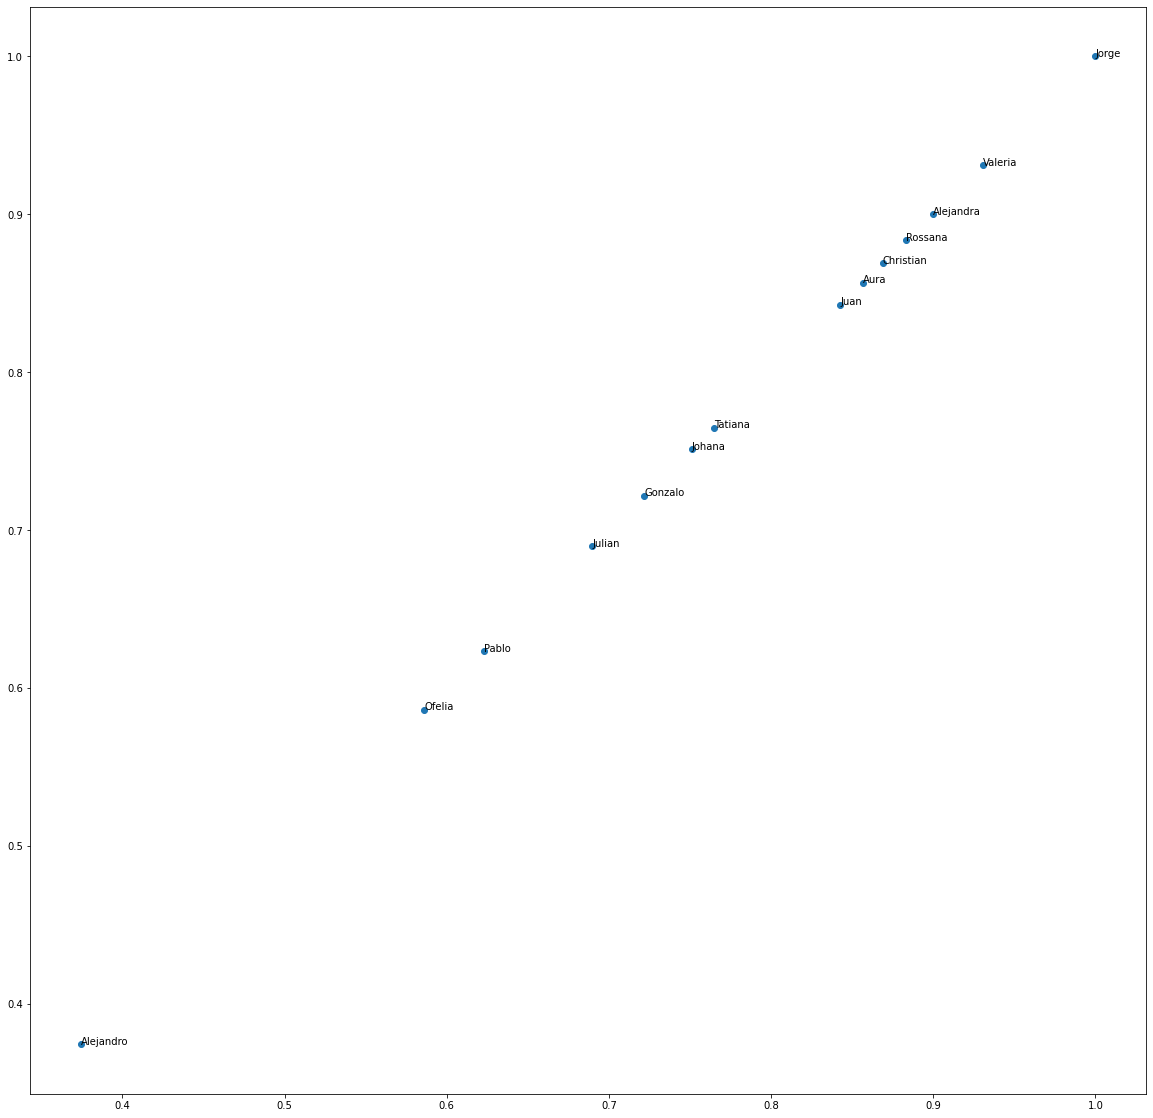

In [8]:
def cos_sim_all (a): 
  name1 = db.loc[db['Nombre']== a].values #Obtener valores del nombre seleccionado y convertir a un arreglo
  name1 = np.delete(name1,0) # Borramos el nombre
  all_names = np.empty(0)
  for i in range(len(db['Nombre'])):
    name2 = (db.loc[i].values)
    name2 = np.delete(name2,0) # Borramos el nombre
    cos_sim = np.dot(name1, name2)/(lng.norm(name1)*lng.norm(name2)) #Calcular la relacion de coseno entre A y B
    all_names = np.insert(all_names, len(all_names), [cos_sim])
  #print ('La relación coseno entre: ' + a + ' y ' + b)

  #Grafico
  fig,ax = plt.subplots()
  fig.set_figheight(20)
  fig.set_figwidth(20)
  ax.scatter(all_names, all_names)

  for i, name in enumerate(db['Nombre']):
    print(i)
    ax.annotate (name, (all_names[i], all_names[i]))

def button_clicked2(b):
  cos_sim_all(names3.value);

button2 = widgets.Button( #Crear botón
    description='Click me',
    disabled= False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
button2.on_click(button_clicked2)
button2


